In [87]:
#create a virtual environment
#conda create --name cook_county python=3.10 -y
#conda activate cook_county

#install packages
#!pip install pandas numpy seaborn matplotlib
#%pip install sweetviz



In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

In [89]:
df = pd.read_csv('data/Sentencing_20241028.csv')

C:\Users\kkusk\AppData\Local\Temp\ipykernel_8232\2389593269.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Sentencing_20241028.csv')


First, see which values are in the unit column:

In [90]:
df['COMMITMENT_UNIT'].value_counts()

COMMITMENT_UNIT
Year(s)         219237
Months           68123
Days             11348
Term              2374
Natural Life       841
Dollars             94
Hours               47
Weeks               24
Pounds               5
Grams                2
Ounces               1
Kilos                1
Name: count, dtype: int64

Next, filter the dataframe to only keep the 'years' values:

In [91]:
years_df = df[df['COMMITMENT_UNIT'] == 'Year(s)'].copy()

Convert the term (now only years) to numeric, with any errors turned into missing values:

In [92]:
# coerce turns errors into NaN (missing values)
years_df['COMMITMENT_TERM'] = pd.to_numeric(years_df['COMMITMENT_TERM'], errors='coerce')

In [93]:
years_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219237 entries, 1 to 303961
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            219237 non-null  int64  
 1   CASE_PARTICIPANT_ID                219237 non-null  int64  
 2   RECEIVED_DATE                      219237 non-null  object 
 3   OFFENSE_CATEGORY                   219237 non-null  object 
 4   PRIMARY_CHARGE_FLAG                219237 non-null  bool   
 5   CHARGE_ID                          219237 non-null  int64  
 6   CHARGE_VERSION_ID                  219237 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  219237 non-null  object 
 8   CHARGE_COUNT                       219237 non-null  int64  
 9   DISPOSITION_DATE                   219237 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        219237 non-null  object 
 11  DISPOSITION_CHARGED_ACT            214893 no

An easy way to select columns is to copy-paste the list of columns into a new cell, and delete columns we don't want. Here, we are keeping columns that look like they have data we want to investigate and don't have lots of missing values:

In [94]:
years_df.columns

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY'],
      dtype='objec

In [95]:
# keep only some columns
keep_cols = ['RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE', 'CHARGE_DISPOSITION',
       'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'LAW_ENFORCEMENT_AGENCY']
keep_df = years_df[keep_cols].copy()

In [96]:
keep_df.head()

,RECEIVED_DATE,OFFENSE_CATEGORY,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,CHARGE_DISPOSITION,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,COMMITMENT_TYPE,COMMITMENT_TERM,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,LAW_ENFORCEMENT_AGENCY
1,08/15/1984 12:00:00 AM,PROMIS Conversion,HOME INVASION,14,12/17/2014 12:00:00 AM,Nolle On Remand,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,06/02/1986 12:00:00 AM,Conversion,Illinois Department of Corrections,30.0,619.0,27.0,Black,Male,NaN,CHICAGO POLICE DEPT
4,08/15/1984 12:00:00 AM,PROMIS Conversion,HOME INVASION,13,12/17/2014 12:00:00 AM,Plea Of Guilty,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,Illinois Department of Corrections,30.0,10982.0,27.0,Black,Male,NaN,CHICAGO POLICE DEPT
5,08/15/1984 12:00:00 AM,PROMIS Conversion,HOME INVASION,13,12/17/2014 12:00:00 AM,Plea Of Guilty,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,06/02/1986 12:00:00 AM,Conversion,Illinois Department of Corrections,30.0,619.0,27.0,Black,Male,NaN,CHICAGO POLICE DEPT
6,08/15/1984 12:00:00 AM,PROMIS Conversion,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,Plea Of Guilty,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,Illinois Department of Corrections,30.0,10982.0,27.0,Black,Male,NaN,CHICAGO POLICE DEPT
7,08/15/1984 12:00:00 AM,PROMIS Conversion,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,Plea Of Guilty,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,06/02/1986 12:00:00 AM,Conversion,Illinois Department of Corrections,30.0,619.0,27.0,Black,Male,NaN,CHICAGO POLICE DEPT


We convert this column to a datetime type, which allows us to do things like `keep_df['DISPOSITION_DATE'].dt.year` and other datetime methods. We could also use arguments like `parse_datetimes` and `infer_datetime_format` in `read_csv` to do this.

In [97]:
keep_df['DISPOSITION_DATE'] = pd.to_datetime(keep_df['DISPOSITION_DATE'], errors='coerce')

C:\Users\kkusk\AppData\Local\Temp\ipykernel_8232\2526583906.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  keep_df['DISPOSITION_DATE'] = pd.to_datetime(keep_df['DISPOSITION_DATE'], errors='coerce')


In [98]:
keep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219237 entries, 1 to 303961
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   RECEIVED_DATE                      219237 non-null  object        
 1   OFFENSE_CATEGORY                   219237 non-null  object        
 2   DISPOSITION_CHARGED_OFFENSE_TITLE  219237 non-null  object        
 3   CHARGE_COUNT                       219237 non-null  int64         
 4   DISPOSITION_DATE                   219232 non-null  datetime64[ns]
 5   CHARGE_DISPOSITION                 219237 non-null  object        
 6   SENTENCE_JUDGE                     218722 non-null  object        
 7   SENTENCE_COURT_NAME                218216 non-null  object        
 8   SENTENCE_COURT_FACILITY            217692 non-null  object        
 9   SENTENCE_PHASE                     219237 non-null  object        
 10  SENTENCE_DATE            

In [99]:
keep_df.shape

(219237, 20)

In [100]:
# drop rows with any missing values - we lost several rows but not too many
keep_df.dropna(inplace=True)
keep_df.shape

(194312, 20)

In [101]:
keep_df['SENTENCE_DATE'] = pd.to_datetime(keep_df['SENTENCE_DATE'], errors='coerce')

C:\Users\kkusk\AppData\Local\Temp\ipykernel_8232\725881988.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  keep_df['SENTENCE_DATE'] = pd.to_datetime(keep_df['SENTENCE_DATE'], errors='coerce')


In [102]:
keep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194312 entries, 151 to 303961
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   RECEIVED_DATE                      194312 non-null  object        
 1   OFFENSE_CATEGORY                   194312 non-null  object        
 2   DISPOSITION_CHARGED_OFFENSE_TITLE  194312 non-null  object        
 3   CHARGE_COUNT                       194312 non-null  int64         
 4   DISPOSITION_DATE                   194312 non-null  datetime64[ns]
 5   CHARGE_DISPOSITION                 194312 non-null  object        
 6   SENTENCE_JUDGE                     194312 non-null  object        
 7   SENTENCE_COURT_NAME                194312 non-null  object        
 8   SENTENCE_COURT_FACILITY            194312 non-null  object        
 9   SENTENCE_PHASE                     194312 non-null  object        
 10  SENTENCE_DATE          

In [103]:
keep_df['SENTENCE_DATE'].dt.year 

151       2022.0
2166      2015.0
2222      2013.0
2284      2012.0
2299      2012.0
           ...  
303947    2024.0
303952    2024.0
303954    2024.0
303958    2024.0
303961    2024.0
Name: SENTENCE_DATE, Length: 194312, dtype: float64

In [104]:
pattern = '[\sA-Za-z,`]+'
keep_df.loc[df['SENTENCE_DATE'].str.contains(pattern, na=False), ['SENTENCE_DATE']]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kkusk\AppData\Local\Temp\ipykernel_8232\1936400204.py:1: SyntaxWarning: invalid escape sequence '\s'
  pattern = '[\sA-Za-z,`]+'


,SENTENCE_DATE
151,2022-09-02
2166,2015-01-28
2222,2013-12-09
2284,2012-01-18
2299,2012-07-11
...,...
303947,2024-09-26
303952,2024-09-30
303954,2024-10-03
303958,2024-09-25


In [105]:
keep_df['SENTENCE_DATE'].dt.year.value_counts() 

SENTENCE_DATE
2014.0    20290
2013.0    19599
2015.0    18656
2012.0    18000
2016.0    17727
2017.0    16093
2018.0    13838
2011.0    13135
2019.0    12653
2022.0    11320
2023.0    11108
2021.0     9466
2024.0     6968
2020.0     5343
2010.0       53
2026.0        7
2051.0        4
2029.0        3
2005.0        3
2212.0        3
2109.0        2
2032.0        2
2027.0        2
2025.0        2
2028.0        2
2108.0        2
2218.0        1
1930.0        1
2216.0        1
2119.0        1
2219.0        1
2048.0        1
2000.0        1
1931.0        1
2006.0        1
2113.0        1
2002.0        1
2038.0        1
2031.0        1
2203.0        1
2112.0        1
Name: count, dtype: int64

In [116]:
keep_df= keep_df[(keep_df['SENTENCE_DATE'].dt.year >= 2010.0) & (keep_df['SENTENCE_DATE'].dt.year <= 2024.0)]

In [117]:
keep_df['SENTENCE_year']=keep_df['SENTENCE_DATE'].dt.year

In [108]:
print(keep_df['SENTENCE_year'])

151       2022
2166      2015
2222      2013
2284      2012
2299      2012
          ... 
303947    2024
303952    2024
303954    2024
303958    2024
303961    2024
Name: SENTENCE_year, Length: 194251, dtype: int32


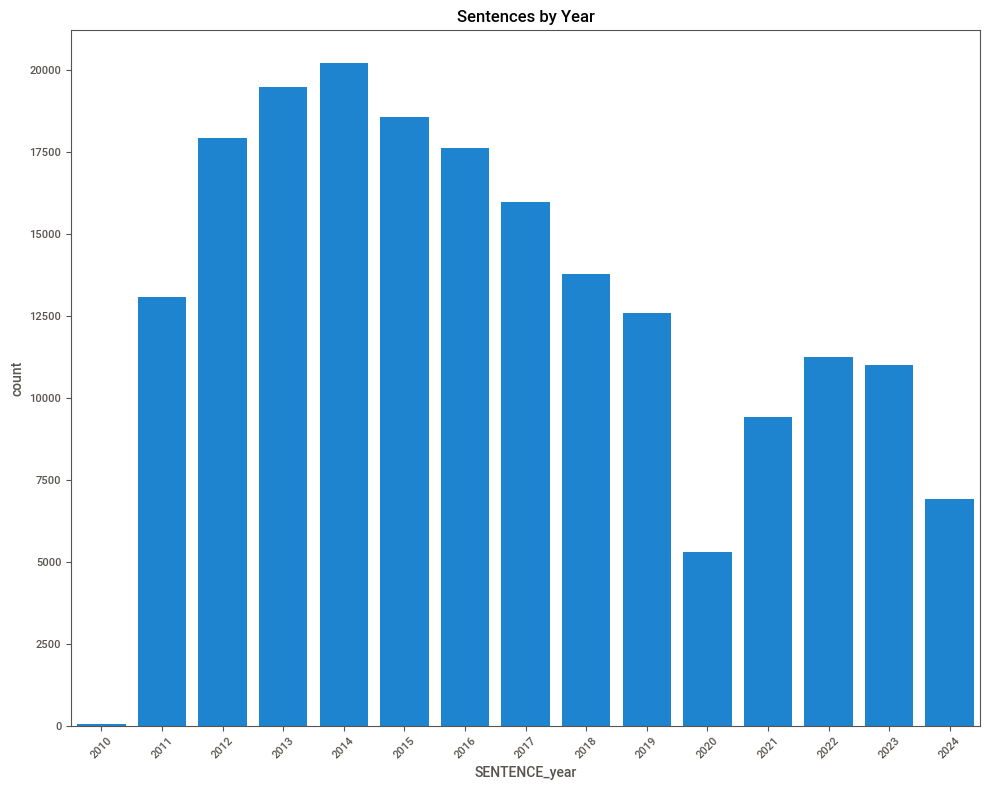

In [118]:
#Sentences by Year
plt.figure(figsize=(10, 8)) 
sns.countplot(data=keep_df, x='SENTENCE_year')
plt.xticks(rotation=45)
plt.title('Sentences by Year')
plt.tight_layout()
plt.show() 

In [119]:
keep_df['RACE'].value_counts()

RACE
Black                           135526
Hispanic                         32799
White                            23235
Asian                             1088
Unknown                            285
American Indian                     74
Biracial                            22
Middle Eastern/North African        11
Name: count, dtype: int64

In [120]:
#collapse race categories
race_mapping = {
    'ASIAN': 'Asian',
    'White [Hispanic or Latino]': 'Hispanic',
    'HISPANIC': 'Hispanic',
    'WHITE': 'White',
    'BLACK': 'Black'
}

keep_df['RACE'] = keep_df['RACE'].replace(race_mapping)


In [121]:
keep_df = keep_df[keep_df['RACE'] != "White/Black [Hispanic or Latino]"]

In [122]:
keep_df['RACE'].value_counts()

RACE
Black                           135526
Hispanic                         32799
White                            23235
Asian                             1088
Unknown                            285
American Indian                     74
Biracial                            22
Middle Eastern/North African        11
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='RACE'>

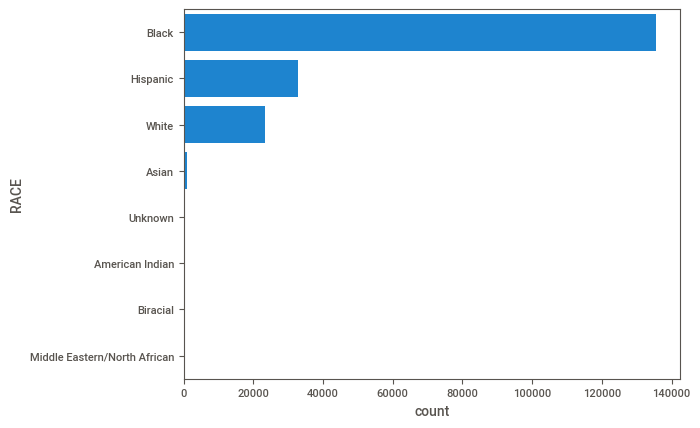

In [123]:
import seaborn as sns
sns.countplot(data=keep_df, y='RACE', order=keep_df['RACE'].value_counts().index)

In [ ]:
# save the auto-EDA report as sentencing_eda.html
report = sv.analyze(keep_df)
report.show_html('sentecing_sweetviz.html')


                                             |          | [  0%]   00:00 -> (? left)